<a href="https://colab.research.google.com/github/tknechtel/TSS_time_series_segmentation/blob/main/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  /content/drive/MyDrive/Masterarbeit/Thesis/Code

/content/drive/MyDrive/Masterarbeit/Thesis/Code


In [ ]:
# ! git clone https://github.com/...

# Packages

In [ ]:
#requirements
#!pip install -r "/content/drive/MyDrive/Masterarbeit/requirements.txt"
! pip install stumpy
!pip install hmmlearn
!pip install imgaug==0.2.7
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 12.3 MB/s 
     |████████████████████████████████| 3.3 MB 47.7 MB/s 
     |████████████████████████████████| 34.5 MB 1.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 14.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 644 kB 14.6 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgau

In [ ]:
import getopt
import os
import platform
import socket
import sys
import time
from datetime import datetime
import copy
import pandas as pd
import statistics as stat
import numpy as np
import stumpy
from stumpy.floss import _cac
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib import animation
from IPython.display import HTML
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.style.reload_library()
plt.style.use(["science","no-latex","nature"])
%matplotlib inline


In [ ]:
datapath = "/content/drive/MyDrive/Masterarbeit/Thesis/Data/Datafinal/"
data_img =  "/content/drive/MyDrive/Masterarbeit/Thesis/Data/Datafinal/IMG/"

# load datasets variables

In [ ]:
synthetic_data = np.genfromtxt( datapath + "syn_1400_6_7.csv", delimiter=',')
synthetic_data = synthetic_data.T
synthetic_data2 = np.genfromtxt(datapath + "syn_1400_12_14.csv", delimiter=',')
synthetic_data2 = synthetic_data2.T
chickendance1 = np.genfromtxt( datapath + "Chicken19_60min_sample.csv",skip_header=1, delimiter=',')
chickendance2 = np.genfromtxt( datapath + "Chicken21_60min_sample.csv",skip_header=1, delimiter=',')
blood_pig = np.genfromtxt( datapath + "blood_pic.csv",skip_header=1, delimiter=',')
nilm1 =np.genfromtxt( datapath + "nilm1_60min_sample.csv",skip_header=1, delimiter=',')
apple =np.genfromtxt( datapath + "apple.csv",skip_header=1, delimiter=',',usecols= range(1,3))
bee =np.genfromtxt( datapath + "bee.csv",skip_header=0, delimiter=',',usecols= range(1,5))
occ =np.genfromtxt( datapath + "occ.csv",skip_header=0, delimiter=',',usecols= range(1,5))
occ2 =np.genfromtxt( datapath + "occ.csv",skip_header=0, delimiter=',',usecols= [1,3])

In [ ]:
print(synthetic_data.shape)
print(synthetic_data2.shape)
print(chickendance1.shape)
print(chickendance2.shape)
print(blood_pig.shape)
print(apple.shape)
print(bee.shape)
print(occ.shape)
print(occ2.shape)

(1400, 6)
(1400, 12)
(1536, 4)
(1285, 4)
(14973, 3)
(622, 2)
(610, 4)
(510, 4)
(510, 2)


# code algorithms

## GGS

In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/apple.py

[0, 131, 215, 245, 319, 321, 462, 538, 623]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/bee.py

[0, 221, 610]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/blood.py

[0, 7490, 14974]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/cd1.py

[0, 108, 314, 523, 773, 914, 1056, 1330, 1537]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/cd2.py

[0, 189, 318, 513, 714, 823, 969, 1168, 1286]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/occ.py

[0, 2, 52, 91, 142, 144, 181, 234, 262, 360, 416, 451, 506, 510]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/syn1.py

[0, 2, 159, 439, 559, 639, 759, 1401]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/GGS/syn2.py

We are done adding breakpoints!
[0, 2, 79, 279, 599, 679, 919, 1039, 1199, 1401]
1401


## IGTS DP

In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/apple_dp.py

0.7063712919999998
54767224.4
Dynamic Programming extracted TT >>> [ 52  56  88 129 200 239 317 365]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/bee_dp.py

53.335582029607004
38.553807396823025
0.45523044096497284
0.7260407011867361
Dynamic Programming extracted TT >>> [185 213]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/blood_dp.py

61.167276000000406
211.68310000000034
249.45205227000068
tcmalloc: large alloc 3587055616 bytes == 0x3d74000 @  0x7f83335a9001 0x7f8330f381af 0x7f8330f8ec23 0x7f8330f8fa87 0x7f8331031823 0x5936cc 0x548c51 0x51566f 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f83331a4c87 0x5b621a
tcmalloc: large alloc 3587055616 bytes == 0xd9a56000 @  0x7f83335a71e7 0x7f8330f380ce 0x7f8330f92726 0x7f8331027841 0x59b076 0x515655 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f83331a4c87 0x5b621a
Dynamic Programming extracted TT >>> [14250]


In [ ]:
! python  /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/cd1_dp.py

48.18511113199997
46.11917496500004
139.534224138
138.77580704900006
Traceback (most recent call last):
  File "/content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/cd1_dp.py", line 22, in <module>



In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/cd2_dp.py

38.508603395999955
39.557458337999954
84.07486064899999
91.04392481199996
Dynamic Programming extracted TT >>> [ 190  338  493  708  829  976 1137]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/occ_dp.py

0.7987650000000005
4.509105333333343
61.12474999999999
96.28824999999998
Dynamic Programming extracted TT >>> [ 51  91 141 181 236 264 338 354 415 460 505]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/syn1_dp.py

1.4313574721748543
1.2422531734050275
1.972937190688406
1.7776036959519388
1.3417623719367182
Dynamic Programming extracted TT >>> [158 437 518 558 637 678 757]


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/syn2_dp.py

2.1401888563649023
2.253089448350165
2.3843648852645476
2.397540423671579
2.2247440366202955
2.02186118448134
2.2448498321772017
2.534204728688058
1.6816142389379785
2.478758353217511
2.5777773217872655
Dynamic Programming extracted TT >>> [  38   77  158  197  278  597  638  677  758  917  997 1038 1078 1197]


## IGTS TD

In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/apple_td.py

0.7063712919999998
54767224.4
TopDown extracted TT >>> (array([130, 322, 239, 318,  47, 365,  26,  55, 621]), array([0.        , 0.03051673, 0.04593603, 0.06119133, 0.06840648,
       0.07280616, 0.07522752, 0.07762605, 0.07981375]), 3)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/bee_td.py

53.335582029607004
38.553807396823025
0.45523044096497284
0.7260407011867361
TopDown extracted TT >>> (array([176,  40, 608]), array([0.        , 0.02324085, 0.03122967]), 1)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/blood_td.py

61.167276000000406
211.68310000000034
249.45205227000068
TopDown extracted TT >>> (array([  500, 14972]), array([0.       , 0.0012961]), 0)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/cd1_td.py

48.18511113199997
46.11917496500004
139.534224138
138.77580704900006
TopDown extracted TT >>> (array([1284, 1085,  523,  199,  347,  927,  784, 1535]), array([0.        , 0.02628889, 0.04855738, 0.08718726, 0.10924703,
       0.12165949, 0.13097651, 0.14031009]), 4)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/cd2_td.py

38.508603395999955
39.557458337999954
84.07486064899999
91.04392481199996
TopDown extracted TT >>> (array([1149,  984,  498,  339,  831,  191,  709, 1284]), array([0.        , 0.01938132, 0.04893238, 0.07827555, 0.10957114,
       0.12354911, 0.13293692, 0.13687984]), 6)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/occ_td.py

0.7987650000000005
4.509105333333343
61.12474999999999
96.28824999999998
TopDown extracted TT >>> (array([271, 415, 183,  51, 460, 236,  90, 141, 505, 450, 359, 508]), array([0.        , 0.04116579, 0.11054612, 0.13589877, 0.16144029,
       0.18264843, 0.20040692, 0.20875543, 0.24236163, 0.25031201,
       0.2555301 , 0.25996869]), 8)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/syn1_td.py

1.4313574721748543
1.2422531734050275
1.972937190688406
1.7776036959519388
1.3417623719367182
TopDown extracted TT >>> (array([ 758,  158,  438,  518,  638,  558,  678, 1399]), array([0.        , 0.1773177 , 0.19789636, 0.20690929, 0.21251311,
       0.2171189 , 0.22098515, 0.22468618]), 1)


In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/IGTS-python/code/syn2_td.py

2.1401888563649023
2.253089448350165
2.3843648852645476
2.397540423671579
2.2247440366202955
2.02186118448134
2.2448498321772017
2.534204728688058
1.6816142389379785
2.478758353217511
2.5777773217872655
TopDown extracted TT >>> (array([1198,  598,  198,  278,  918,  638,  998, 1078,  758, 1038,  678,
         38,   78,  158, 1399]), array([0.        , 0.06483169, 0.07827663, 0.09461274, 0.10355483,
       0.11046076, 0.11663358, 0.12204258, 0.12790294, 0.13224164,
       0.13620712, 0.13977388, 0.14309127, 0.14572335, 0.1481756 ]), 1)


## Autoplait

In [ ]:
! python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/apple.py

PowerTransformer()
 r:	 1
 m:	 1
 costT:	inf
	-- try to split: inf vs inf
===> elapsed time:10.375027179718018 [sec]
[[  0 622]] 0


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/bee.py

 r:	 1
 m:	 1
 costT:	5192.87
	-- try to split: 5095.59 vs 5158.87
 r:	 2
 m:	 3
 costT:	5078.99
	-- try to split: 3670.44 vs 3075.1
 r:	 2
 m:	 3
 costT:	5078.99
	-- try to split: 2126.55 vs 1865.73
===> elapsed time:12.674628973007202 [sec]
[[  0  29]
 [232 377]] 0
[[ 29 203]] 1


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/blood.py

MinMaxScaler()
 r:	 1
 m:	 1
 costT:	inf
!! --- centroid not found
	-- try to split: inf vs inf
===> elapsed time:109.58432030677795 [sec]
[[    0 14973]] 0


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/cd1.py

PowerTransformer()
 r:	 1
 m:	 1
 costT:	9185.63
	-- try to split: 8318.92 vs 9151.63
 r:	 2
 m:	 6
 costT:	8187.54
	-- try to split: 4061.72 vs 5322.86
 r:	 3
 m:	 10
 costT:	6939.2
	-- try to split: 1277.91 vs 1261.94
 r:	 3
 m:	 10
 costT:	6939.2
	-- try to split: 2896.02 vs 2640.09
 r:	 3
 m:	 10
 costT:	6939.2
	-- try to split: 2305.59 vs 2721.51
 r:	 4
 m:	 10
 costT:	6670.62
	-- try to split: 2110.16 vs 2184.28
 r:	 5
 m:	 15
 costT:	6835.61
	-- try to split: 1445.87 vs 1221.47
 r:	 5
 m:	 15
 costT:	6835.61
!! --- centroid not found
	-- try to split: inf vs 823.159
 r:	 5
 m:	 15
 costT:	6835.61
fixed sampling
	-- try to split: 296.011 vs 39.6588
===> elapsed time:50.863032579422 [sec]
[[ 346  158]
 [1083  184]] 0
[[ 103  243]
 [ 504  125]
 [ 930  153]
 [1267   30]] 1
[[ 629  102]
 [ 921    9]
 [1297    8]
 [1308    4]
 [1318   18]
 [1367  160]] 2
[[ 731  190]
 [1305    3]] 3
[[  0 103]] 4


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/cd2.py

 r:	 1
 m:	 1
 costT:	6059.96
	-- try to split: 3457.98 vs 6025.96
 r:	 2
 m:	 5
 costT:	3418.85
	-- try to split: 2462.4 vs 2592.05
 r:	 3
 m:	 9
 costT:	3383.57
!! --- centroid not found
	-- try to split: inf vs 1388.61
 r:	 3
 m:	 9
 costT:	3383.57
	-- try to split: 1216.77 vs 996.031
 r:	 3
 m:	 9
 costT:	3383.57
	-- try to split: 1317.25 vs 685.154
===> elapsed time:31.566763639450073 [sec]
[[ 371   87]
 [1019   87]] 0
[[ 339   32]
 [ 458   26]
 [ 985   34]
 [1106   28]] 1
[[   0  339]
 [ 484  501]
 [1134  151]] 2


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/occ.py

 r:	 1
 m:	 1
 costT:	3205.88
	-- try to split: 5834.88 vs 3171.88
===> elapsed time:5.370389938354492 [sec]
[[  0 509]] 0


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/syn1.py

MinMaxScaler()
[[0.20629519 0.88824657 0.85026179 0.87154936 0.89230509 0.88601923]
 [0.21898336 0.99599517 0.94739108 0.96732259 0.99295697 0.98682492]
 [0.21786008 0.99042717 0.96143129 0.95170762 0.99275314 0.98124895]
 ...
 [0.05847714 0.01166687 0.0489207  0.04974842 0.02707166 0.03632013]
 [0.06236028 0.01392969 0.05362649 0.05196528 0.03055782 0.02777789]
 [0.05909236 0.01828118 0.06810406 0.06491476 0.02801864 0.02907945]]
 r:	 1
 m:	 1
 costT:	187.144
	-- try to split: 16019.2 vs 153.144
===> elapsed time:13.294229507446289 [sec]
[[   0 1391]] 0


In [ ]:
!python /content/drive/MyDrive/Masterarbeit/Thesis/Code/autoplait/syn2.py

MinMaxScaler()
[[0.63103612 0.89679776 0.39367004 ... 0.18898279 0.38238643 0.51704644]
 [0.70342723 0.98921575 0.43051471 ... 0.21439002 0.43072549 0.57795178]
 [0.70336311 0.99154242 0.42888256 ... 0.21319873 0.4290742  0.57854177]
 ...
 [0.01487241 0.01250194 0.0216678  ... 0.03352408 0.02714537 0.00448532]
 [0.01192763 0.01184596 0.02391999 ... 0.03844439 0.02901518 0.01209147]
 [0.00885734 0.01820436 0.02744983 ... 0.0401834  0.02773194 0.00888823]]
 r:	 1
 m:	 1
 costT:	31592.1
	-- try to split: 26633.3 vs 31558.1
 r:	 2
 m:	 4
 costT:	25826.5
	-- try to split: 22223.8 vs 22301.4
 r:	 3
 m:	 6
 costT:	25247.7
fixed sampling
Fitting a model with 51 free scalar parameters with only 24 data points will result in a degenerate solution.
Fitting a model with 51 free scalar parameters with only 24 data points will result in a degenerate solution.
Fitting a model with 51 free scalar parameters with only 24 data points will result in a degenerate solution.
	-- try to split: 1340.72 vs 104

# REA (for all fluss experiments)


In [ ]:
def _rea(cac, n_regimes, L, excl_factor=5):
    """
    Find the location of the regimes using the regime extracting
    algorithm (REA)

    Parameters
    ----------
    cac : numpy.ndarray
        The corrected arc curve

    n_regimes : int
        The number of regimes to search for. This is one more than the
        number of regime changes as denoted in the original paper.

    L : int
        The subsequence length that is set roughly to be one period length.
        This is likely to be the same value as the window size, `m`, used
        to compute the matrix profile and matrix profile index but it can
        be different since this is only used to manage edge effects
        and has no bearing on any of the IAC or CAC core calculations.

    excl_factor : int, default 5
        The multiplying factor for the regime exclusion zone

    Returns
    -------
    regime_locs : numpy.ndarray
        The locations of the regimes

    Notes
    -----
    DOI: 10.1109/ICDM.2017.21 <https://www.cs.ucr.edu/~eamonn/Segmentation_ICDM.pdf>`__

    See Table II

    This is the implementation for the regime extracting algorithm (REA).
    """
    regime_locs = np.empty(n_regimes - 1, dtype=np.int64)
    tmp_cac = copy.deepcopy(cac)
    for i in range(n_regimes - 1):
        regime_locs[i] = np.argmin(tmp_cac)
        excl_start = max(regime_locs[i] - excl_factor * L, 0)
        excl_stop = min(regime_locs[i] + excl_factor * L, cac.shape[0])
        tmp_cac[excl_start:excl_stop] = 1.0

    return regime_locs

# Experiment Apple Dataset


In [ ]:
#scaler = MinMaxScaler()
my_data = apple
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)
#df1= pd.read_csv(datapath + "bee.csv", delimiter=',',index_col=False) 
df = pd.read_csv(datapath + "bee.csv", delimiter=',',index_col=False, usecols=[1, 2,3,4] ) 

StandardScaler()


0
[547 479 413 241   0   0   0   0]
1
[558  87 341 474   0   0   0   0]
Final [552  87 479 413 341 241   0   0]


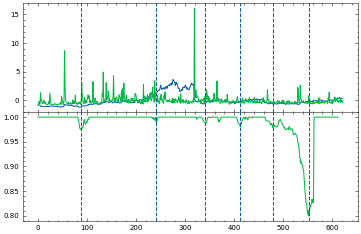

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=10)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=9, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 ) / 2;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=9,L=10,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

In [ ]:
print(regime_locations)

[552  87 479 413 341 241   0   0]


In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/Masterarbeit/Thesis/Code/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [ ]:
synthetic_data = np.genfromtxt( datapath + "syn_1400_6_7.csv", delimiter=',')
synthetic_data_1_v2 = np.genfromtxt("/content/drive/MyDrive/Masterarbeit/Thesis/Data/Datafinal/syn1_v2.csv", delimiter=',')
synthetic_data_2_v2 = np.genfromtxt('/content/drive/MyDrive/Masterarbeit/Thesis/Data/Datafinal/syn2_v2.csv', delimiter=',')
synthetic_data2 = np.genfromtxt(datapath + "syn_1400_12_14.csv", delimiter=',')
chickendance1 = np.genfromtxt( datapath + "Chicken19_60min_sample.csv",skip_header=1, delimiter=',')
chickendance2 = np.genfromtxt( datapath + "Chicken21_60min_sample.csv",skip_header=1, delimiter=',')
blood_pig = np.genfromtxt( datapath + "blood_pic.csv",skip_header=1, delimiter=',')
nilm1 =np.genfromtxt( datapath + "nilm1_60min_sample.csv",skip_header=1, delimiter=',')
apple =np.genfromtxt( datapath + "apple.csv",skip_header=1, delimiter=',',usecols= range(1,3))
bee =np.genfromtxt( datapath + "bee.csv",skip_header=1, delimiter=',',usecols= range(1,5))
occ =np.genfromtxt( datapath + "occ.csv",skip_header=1, delimiter=',',usecols= range(1,5))
occ2 =np.genfromtxt( datapath + "occ.csv",skip_header=1, delimiter=',',usecols= [1,3])

In [ ]:
#scaler = MinMaxScaler()
my_data =chickendance2
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)
#df1= pd.read_csv(datapath + "bee.csv", delimiter=',',index_col=False) 
df = pd.read_csv(datapath + "Chicken19_60min_sample.csv", delimiter=',',index_col=False) 

StandardScaler()


In [ ]:
df = pd.DataFrame(my_data)

In [ ]:
synthetic_data2.shape

(1400, 12)

In [ ]:
synthetic_data_1_v2.T.shape

(1400, 6)

In [ ]:
df = df.T

In [ ]:
df.info

<bound method DataFrame.info of              0         1         2         3
0    -1.288234 -1.218694  0.365877  0.342926
1    -1.238806 -1.161776  0.358898  0.334904
2    -1.195201 -1.098863  0.363695  0.335175
3    -1.151302 -1.035775  0.365995  0.335816
4    -1.094401 -0.976693  0.362684  0.342500
...        ...       ...       ...       ...
1280 -0.211888 -0.231630  0.771316  0.659785
1281 -0.220696 -0.228854  0.770517  0.654736
1282 -0.234943 -0.229171  0.767816  0.654308
1283 -0.258510 -0.237341  0.760968  0.658914
1284 -0.279079 -0.251827  0.763928  0.657599

[1285 rows x 4 columns]>

In [ ]:
df = df.iloc[:, [4, 0, 11]]

In [ ]:
filepath = Path('/content/drive/MyDrive/Masterarbeit/Thesis/Data/Datafinal/syn2_v2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath,index=False)

In [ ]:
mps, indices = stumpy.mstump(df, m=10)

In [ ]:
motifs_idx = np.argmin(mps, axis=1)

In [ ]:
nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx]

In [ ]:
nn_idx

array([473, 364, 368, 448])

In [ ]:
m=10
mdls, subspaces = stumpy.mdl(df, m, motifs_idx, nn_idx)

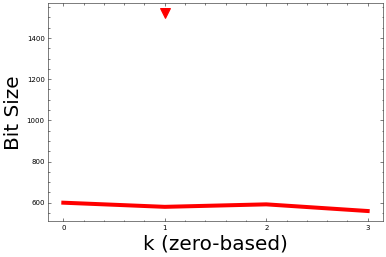

In [ ]:
plt.plot(np.arange(len(mdls)), mdls, c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Bit Size', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1520, marker="v", markersize=10, color='red')
plt.show()

In [ ]:

k = np.argmin(mdls)

print(df.columns[subspaces[k]])


Int64Index([0, 3, 2, 1], dtype='int64')


In [ ]:
df

array([[-0.81597884, -0.72063202],
       [-0.82069832, -0.45519335],
       [-0.81597884, -0.16399265],
       ...,
       [ 0.28014539, -0.28374125],
       [ 0.32016905,  0.034516  ],
       [ 0.36774453, -0.36284735]])

regime_locations = Lrea(c1,10,L=100,excl_factor=6)
regime_locations

In [ ]:
print(c1.shape)
print(c2.shape)
print(c3.shape)
print(c4.shape)



(1507,)
(1507,)
(1507,)
(1507,)


# Experiment Bee Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = bee
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)
my_data.shape

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


(609, 4)

0
[350 299]
1
[549   0]
2
[548 185]
3
[544   0]
Final [549 350]


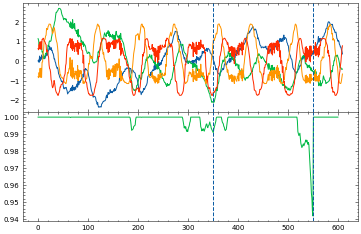

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=10)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=3, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
#Multi_D_CAC = (c3 + c4) / 2;
#Multi_D_CAC_3 = (c1 + c2 ) / 2;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC,n_regimes=3,L=10,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
#axs[0].axvline(x=regime_locations[2], linestyle="dashed")
#axs[0].axvline(x=regime_locations[3], linestyle="dashed")
#axs[0].axvline(x=regime_locations[4], linestyle="dashed")
#axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC.shape[0]), Multi_D_CAC, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
#axs[1].axvline(x=regime_locations[2], linestyle="dashed")
#axs[1].axvline(x=regime_locations[3], linestyle="dashed")
#axs[1].axvline(x=regime_locations[4], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiment occ Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = occ2
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


0
[219 457   0   0   0   0   0   0   0   0]
1
[ 42 450  77 137 359 419 262 316 224 179]
Final [ 42 450  77 137 359 419 262 316 224 179]


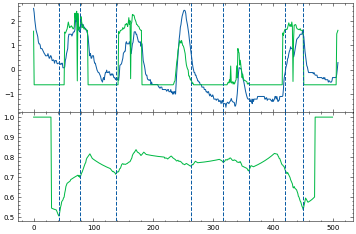

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=10)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=11, excl_factor=3)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c3 ) / 2;
Multi_D_CAC_3 = (c1 + c2 ) / 2;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=11,L=10,excl_factor=3)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
axs[0].axvline(x=regime_locations[6], linestyle="dashed")
axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
axs[1].axvline(x=regime_locations[6], linestyle="dashed")
axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiment chickendance 1 Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = chickendance1
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


0
[ 160 1350 1400  100  269  450]
1
[ 137   83  191 1317  242 1367]
2
[1351 1195 1285  222  549 1136]
3
[ 624  685  537 1347 1183  896]
Final [1347  191   85 1182  538  638]


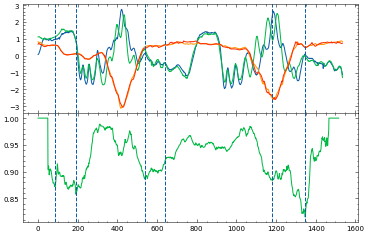

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=20)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=7, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 + c3 +c4 ) / 4;
Multi_D_CAC_3 = ( c2 + c3 +c4 ) / 3;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=7,L=20,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiment chickendance 2 Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = chickendance2
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


0
[  50  101  151 1199 1140  201 1089]
1
[1146 1204  159 1095  214  264  314]
2
[ 277  211   67 1163 1215  327  138]
3
[1131 1181  308  224  117  173 1080]
Final [1144  160   51  264 1043  400    0]


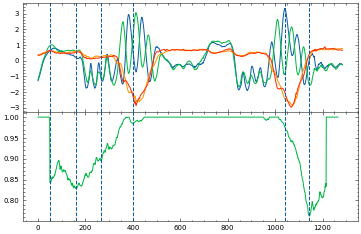

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=20)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=7, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 + c3 +c4 ) / 4;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=7,L=20,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiment blood Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = blood_pig
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


0
[572]
1
[7458]
2
[7403]
Final [7445]


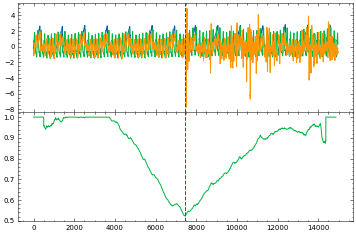

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=100)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=100, n_regimes=2, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 + c3 ) / 3;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=2,L=100,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
#axs[0].axvline(x=regime_locations[1], linestyle="dashed")
#axs[0].axvline(x=regime_locations[2], linestyle="dashed")
#axs[0].axvline(x=regime_locations[3], linestyle="dashed")
#axs[0].axvline(x=regime_locations[4], linestyle="dashed")
#axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
#axs[1].axvline(x=regime_locations[1], linestyle="dashed")
#axs[1].axvline(x=regime_locations[2], linestyle="dashed")
#axs[1].axvline(x=regime_locations[3], linestyle="dashed")
#axs[1].axvline(x=regime_locations[4], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiments syn1 Dataset

In [ ]:
#scaler = MinMaxScaler()
my_data = synthetic_data_1_v2
scaler = StandardScaler()
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 

StandardScaler()


In [ ]:
my_data = synthetic_data_2_v2

0
[1224 1288 1170  339 1080 1339]
1
[1341 1233 1168 1285  785  733]
2
[1273 1220 1169  106 1324 1079]
Final [1220 1069  339  106  785  616]


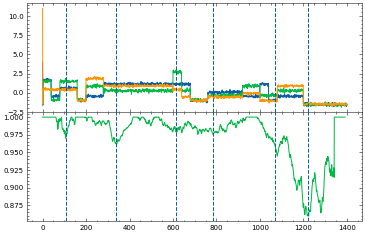

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=10)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=7, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 4:
        mp5 = mp
        c5 = cac
        r5 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 5:
        mp6 = mp
        c6 = cac
        r6 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 6:
        mp7 = mp
        c7 = cac
        r7 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 +c3 ) / 3;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=7,L=30,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# Experiments syn2 Dataset

In [ ]:
#scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

my_data = synthetic_data2
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler.fit(my_data))

#print(scaler.transform(data))
my_data = scaler.transform(my_data)

#df = pd.read_csv(datapath + "apple.csv", delimiter=',',index_col=False, usecols=[1, 2] ) 
my_data.shape

MinMaxScaler()


(1400, 12)

0
[1340 1232 1167 1284  784  732  836  888  679 1116  628    0    0]
1
[ 369  426  767  954  317  499  863 1031  603  238  551 1159  689]
2
[1309  678   69  613 1213  431  744 1038  552  965 1098  895  794]
3
[ 938  812  706 1038  756 1198  204  868 1127  655  264  152  547]
4
[1223 1289 1169  338 1079 1340  597  389 1026  269  497  846  647]
5
[1210   92  148 1318 1267  358 1125  300  205  408  951  737  686]
6
[ 821  748 1147 1080  871 1298  991  925  697  300  404  511  607]
7
[1262  685  629 1172  741  111  556  843 1329    0    0    0    0]
8
[ 125  175  281  225  500  367  422  842 1338    0    0    0    0]
9
[403 616 553 696 797 746 197 460 310 851   0   0   0]
10
[1006  687  432 1307 1199  935 1252  530  790  737  879  623  172]
11
[1272 1219 1168  105 1323 1078 1027  484  662  541  716  611    0]
Final [1337 1207 1286  745  690 1156  431  613   69  805  369  863  965]


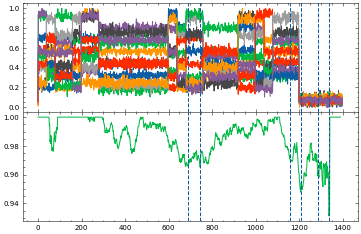

In [ ]:
for col in range(my_data.shape[1]):
    mp = stumpy.stump(my_data[:,col], m=10)
    cac, regime_locations  = stumpy.fluss(mp[:,1],L=10, n_regimes=14, excl_factor=5)
    if col == 0:
        mp1 = mp
        c1 = cac
        r1 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 1:
        mp2 = mp
        c2 = cac
        r2 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 2:
        mp3 = mp
        c3 = cac
        r3 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 3:
        mp4 = mp
        c4 = cac
        r4 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 4:
        mp5 = mp
        c5 = cac
        r5 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 5:
        mp6 = mp
        c6 = cac
        r6 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 6:
        mp7 = mp
        c7 = cac
        r7 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 7:
        mp8 = mp
        c8 = cac
        r8 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 8:
        mp9 = mp
        c9 = cac
        r9 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 9:
        mp10 = mp
        c10 = cac
        r10 = regime_locations
        print(col)
       #print(cac)
        print(regime_locations)
    elif col == 10:
        mp11 = mp
        c11 = cac
        r11 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 11:
        mp12 = mp
        c12 = cac
        r12 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 12:
        mp13 = mp
        c13 = cac
        r13 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)
    elif col == 13:
        mp14 = mp
        c14 = cac
        r14 = regime_locations
        print(col)
        #print(cac)
        print(regime_locations)

#Multi_D_CAC = (c1 + c2 + c3 + c4) / 4;
Multi_D_CAC_3 = (c1 + c2 +c3) / 3;
#Multi_D_REG = (r1 + r2 + r3 + r4) / 4;
#mp_all = (mp1 + mp2 + mp3 + mp4) / 4;    

#cac_all, regime_locations_all  = stumpy.fluss(mp_all[:,1],L=30, n_regimes=7, excl_factor=1)

regime_locations = _rea(Multi_D_CAC_3,n_regimes=14,L=10,excl_factor=5)

print("Final", regime_locations)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(my_data.shape[0]), my_data)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[0].axvline(x=regime_locations[1], linestyle="dashed")
axs[0].axvline(x=regime_locations[2], linestyle="dashed")
axs[0].axvline(x=regime_locations[3], linestyle="dashed")
axs[0].axvline(x=regime_locations[4], linestyle="dashed")
axs[0].axvline(x=regime_locations[5], linestyle="dashed")
#axs[0].axvline(x=regime_locations[6], linestyle="dashed")
#axs[0].axvline(x=regime_locations[7], linestyle="dashed")
axs[1].plot(range(Multi_D_CAC_3.shape[0]), Multi_D_CAC_3, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].axvline(x=regime_locations[1], linestyle="dashed")
axs[1].axvline(x=regime_locations[2], linestyle="dashed")
axs[1].axvline(x=regime_locations[3], linestyle="dashed")
axs[1].axvline(x=regime_locations[4], linestyle="dashed")
axs[1].axvline(x=regime_locations[5], linestyle="dashed")
#axs[1].axvline(x=regime_locations[6], linestyle="dashed")
#axs[1].axvline(x=regime_locations[7], linestyle="dashed")
#axs[1].axvline(x=regime_locations[5], linestyle="dashed")
plt.show()

# sonstiges, test

In [ ]:
from pandas._libs.lib import count_level_2d
import numpy as np

arr = c1
arr1 = c2
arr2 = c3
arr3 = c4

df = pd.DataFrame(arr, columns = ['c1'])
df["c2"] = pd.DataFrame(arr1, columns = ['c2'])
df["c3"] = pd.DataFrame(arr2, columns = ['c3'])
df["c4"] = pd.DataFrame(arr3, columns = ['c4'])


df


,c1,c2,c3,c4
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
991,1.0,1.0,1.0,1.0
992,1.0,1.0,1.0,1.0
993,1.0,1.0,1.0,1.0
994,1.0,1.0,1.0,1.0


In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/Masterarbeit/Thesis/Code/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)